In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from matplotlib import pyplot

# MNISTのデータを読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# データを4x8に出力
for i in range(0, 32):
    pyplot.subplot(4, 8, i + 1)
    pyplot.imshow(X_train[i], cmap='gray')

pyplot.show()


<Figure size 640x480 with 32 Axes>

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
# データを28*28=784の一次元配列に変換
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

In [6]:
# 入力と出力を指定
in_size = 28 * 28
out_size = 10

# モデル構造を定義
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dense(out_size, activation='softmax'))

# モデルを構築
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行
model.fit(X_train, y_train,
    batch_size=20, epochs=20)

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1895 - acc: 0.9441
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0803 - acc: 0.9757
Epoch 3/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0518 - acc: 0.9832
Epoch 4/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0374 - acc: 0.9883
Epoch 5/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0283 - acc: 0.9907
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0219 - acc: 0.9927
Epoch 7/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0193 - acc: 0.9936
Epoch 8/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0174 - acc: 0.9942
Epoch 9/20
60000/60000 [==============================] - 5s 81us/step - loss: 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2465 - acc: 0.9244 - val_loss: 0.1126 - val_acc: 0.9657
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1039 - acc: 0.9677 - val_loss: 0.0823 - val_acc: 0.9758
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0755 - acc: 0.9764 - val_loss: 0.0941 - val_acc: 0.9741
Epoch 4/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0618 - acc: 0.9814 - val_loss: 0.0747 - val_acc: 0.9798
Epoch 5/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0525 - acc: 0.9843 - val_loss: 0.0856 - val_acc: 0.9766
Epoch 6/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0436 - acc: 0.9868 - val_loss: 0.0772 - val_acc: 0.9809
Epoch 7/50
60

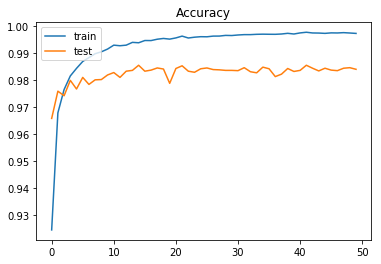

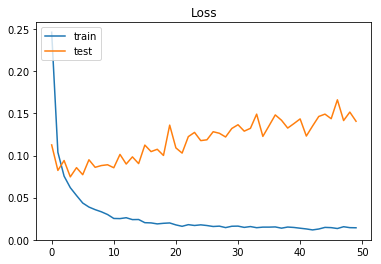

In [7]:
# MLPでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
in_size = 28 * 28
out_size = 10

# MNISTのデータを読み込み --- (*1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを28*28=784の一次元配列に変換
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

# MLPモデル構造を定義 --- (*2)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

# モデルを構築 --- (*3)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*4)
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価 --- (*5)
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*6)
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 103us/step - loss: 0.2217 - acc: 0.9327 - val_loss: 0.0523 - val_acc: 0.9837
Epoch 2/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.0813 - acc: 0.9767 - val_loss: 0.0408 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0604 - acc: 0.9823 - val_loss: 0.0374 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 4s 70us/step - loss: 0.0521 - acc: 0.9845 - val_loss: 0.0355 - val_acc: 0.9877
Epoch 5/12
60000/60000 [==============================] - 4s 69us/step - loss: 0.0491 - acc: 0.9862 - val_loss: 0.0333 - val_acc: 0.9905
Epoch 6/12
60000/60000 [==============================] - 4s 68us/step - loss: 0.0480 - acc: 0.9864 - val_loss: 0.0374 - val_acc: 0.9883
Epoch 7/12
60000/60000 [==============================] - 4s 68us/step - loss: 0.0464 - acc: 0.9867 - val_loss: 0.0316 - val_ac

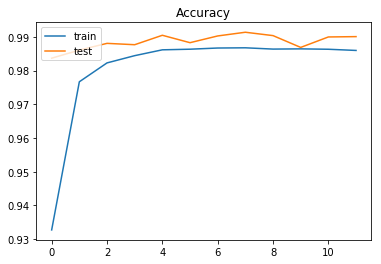

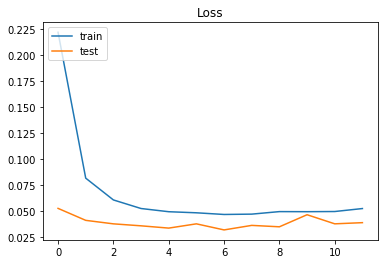

In [8]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
in_shape = (28, 28, 1)
out_size = 10


# MNISTのデータを読み込み 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを(1, 28, 28)の三次元配列に変換
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

# CNNモデル構造を定義 --- (*2)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

# モデルを構築 --- (*3)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*4)
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価 --- (*5)
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*6)
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 読み込んだデータをの三次元配列に変換
X_train = X_train.reshape(-1, 28, 28, 1)
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
